In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Cargar el dataset
df = pd.read_csv("/content/ETF prices.csv")

dataset = df.copy()

# Convertir price_date a tipo datetime
df["price_date"] = pd.to_datetime(df["price_date"])

# Ordenar por fecha
df = df.sort_values(by=["fund_symbol", "price_date"])

# Obtener el precio de cierre ajustado inicial y final por cada ETF
df_agg = df.groupby("fund_symbol").agg(
    first_price=("adj_close", "first"),
    last_price=("adj_close", "last")
)

# Calcular el rendimiento porcentual
df_agg["return"] = (df_agg["last_price"] - df_agg["first_price"]) / df_agg["first_price"] * 100

# Filtrar ETFs con precios iniciales mayores a 0 para evitar valores infinitos
df_agg = df_agg[df_agg["first_price"] > 0]

# Obtener el top 20 de ETFs con mayor rendimiento
df_agg = df_agg.nlargest(20, "return")

# Agregar una columna con el ranking
df_agg["top_rank"] = range(1, 21)

# Mostrar el resultado
print(df)


        fund_symbol price_date   open   high    low  close  adj_close  volume
0               AAA 2020-09-09  25.10  25.12  25.07  25.07      24.85   17300
1               AAA 2020-09-10  25.06  25.07  25.05  25.07      24.85   23500
2               AAA 2020-09-11  25.04  25.05  25.02  25.03      24.81   33400
3               AAA 2020-09-14  25.01  25.06  25.01  25.02      24.80   13100
4               AAA 2020-09-15  25.02  25.03  25.01  25.01      24.79   12100
...             ...        ...    ...    ...    ...    ...        ...     ...
3866025         ZSL 2021-11-23  26.81  27.21  26.30  26.35      26.35  190900
3866026         ZSL 2021-11-24  26.79  26.96  26.57  26.69      26.69  109000
3866027         ZSL 2021-11-26  26.67  28.14  26.67  27.72      27.72  205500
3866028         ZSL 2021-11-29  27.89  28.56  27.80  28.27      28.27  411900
3866029         ZSL 2021-11-30  28.15  28.73  25.91  28.49      28.49  219400

[3866030 rows x 8 columns]


In [3]:
print(df_agg)

             first_price  last_price        return  top_rank
fund_symbol                                                 
TECL                0.25       80.22  31988.000000         1
TQQQ                0.86      163.49  18910.465116         2
SOXL                0.62       64.67  10330.645161         3
RETL                0.50       40.79   8058.000000         4
UPRO                2.35      134.85   5638.297872         5
AMER                0.67       30.50   4452.238806         6
QLD                 1.97       87.61   4347.208122         7
ROM                 4.16      124.35   2889.182692         8
MIDU                2.40       60.74   2430.833333         9
CURE                4.70      112.73   2298.510638        10
UDOW                3.14       72.64   2213.375796        11
USD                 2.41       54.08   2143.983402        12
SPY                25.80      455.56   1665.736434        13
FRAK                9.34      157.50   1586.295503        14
DRN                 1.49

In [4]:
df.head(100)

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
95,AAA,2021-01-26,25.16,25.17,25.16,25.17,25.02,500
96,AAA,2021-01-27,25.14,25.15,25.14,25.15,25.01,500
97,AAA,2021-01-28,25.15,25.15,25.15,25.15,25.01,200
98,AAA,2021-01-29,25.16,25.16,25.15,25.15,25.00,3100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866030 entries, 0 to 3866029
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fund_symbol  object        
 1   price_date   datetime64[ns]
 2   open         float64       
 3   high         float64       
 4   low          float64       
 5   close        float64       
 6   adj_close    float64       
 7   volume       int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 236.0+ MB


In [6]:
pd.set_option('display.max_columns', None)
print(dataset)

        fund_symbol  price_date   open   high    low  close  adj_close  volume
0               AAA  2020-09-09  25.10  25.12  25.07  25.07      24.85   17300
1               AAA  2020-09-10  25.06  25.07  25.05  25.07      24.85   23500
2               AAA  2020-09-11  25.04  25.05  25.02  25.03      24.81   33400
3               AAA  2020-09-14  25.01  25.06  25.01  25.02      24.80   13100
4               AAA  2020-09-15  25.02  25.03  25.01  25.01      24.79   12100
...             ...         ...    ...    ...    ...    ...        ...     ...
3866025         ZSL  2021-11-23  26.81  27.21  26.30  26.35      26.35  190900
3866026         ZSL  2021-11-24  26.79  26.96  26.57  26.69      26.69  109000
3866027         ZSL  2021-11-26  26.67  28.14  26.67  27.72      27.72  205500
3866028         ZSL  2021-11-29  27.89  28.56  27.80  28.27      28.27  411900
3866029         ZSL  2021-11-30  28.15  28.73  25.91  28.49      28.49  219400

[3866030 rows x 8 columns]


In [10]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, TECL to SMH
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   first_price  20 non-null     float64
 1   last_price   20 non-null     float64
 2   return       20 non-null     float64
 3   top_rank     20 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.3+ KB


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866030 entries, 0 to 3866029
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fund_symbol  object 
 1   price_date   object 
 2   open         float64
 3   high         float64
 4   low          float64
 5   close        float64
 6   adj_close    float64
 7   volume       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 236.0+ MB


In [12]:
dataset.head(100)

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
95,AAA,2021-01-26,25.16,25.17,25.16,25.17,25.02,500
96,AAA,2021-01-27,25.14,25.15,25.14,25.15,25.01,500
97,AAA,2021-01-28,25.15,25.15,25.15,25.15,25.01,200
98,AAA,2021-01-29,25.16,25.16,25.15,25.15,25.00,3100


In [13]:
numerical_columns = dataset.select_dtypes(include=['float64', 'int64'])

In [14]:
dataset.describe()

,open,high,low,close,adj_close,volume
count,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06
mean,1.202537e+05,1.262811e+05,1.149734e+05,1.196726e+05,1.196579e+05,1.026745e+06
std,1.149917e+07,1.208270e+07,1.097204e+07,1.143655e+07,1.143655e+07,1.275733e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.486000e+01,2.494000e+01,2.476000e+01,2.485000e+01,2.229000e+01,3.553000e+03
50%,3.388000e+01,3.406000e+01,3.368000e+01,3.387000e+01,3.108000e+01,2.133900e+04
75%,5.417000e+01,5.441000e+01,5.390000e+01,5.416000e+01,5.007000e+01,1.269000e+05
max,2.656750e+09,2.808750e+09,2.609750e+09,2.808750e+09,2.808750e+09,2.987062e+09


In [15]:
# Ordenar el dataset por fecha de manera ascendente
dataset = dataset.sort_values(by="price_date", ascending=True)

# Mostrar las primeras filas del dataset ordenado
print(df.head(50))

   fund_symbol price_date   open   high    low  close  adj_close  volume
0          AAA 2020-09-09  25.10  25.12  25.07  25.07      24.85   17300
1          AAA 2020-09-10  25.06  25.07  25.05  25.07      24.85   23500
2          AAA 2020-09-11  25.04  25.05  25.02  25.03      24.81   33400
3          AAA 2020-09-14  25.01  25.06  25.01  25.02      24.80   13100
4          AAA 2020-09-15  25.02  25.03  25.01  25.01      24.79   12100
5          AAA 2020-09-16  24.97  24.98  24.97  24.97      24.75   14100
6          AAA 2020-09-17  24.99  25.00  24.98  24.98      24.76   15200
7          AAA 2020-09-18  24.97  24.98  24.97  24.98      24.76    5300
8          AAA 2020-09-21  24.99  24.99  24.98  24.98      24.76    8600
9          AAA 2020-09-22  24.98  24.99  24.98  24.98      24.76    8100
10         AAA 2020-09-23  24.99  25.00  24.99  24.99      24.77    4400
11         AAA 2020-09-24  24.99  24.99  24.98  24.98      24.76    7000
12         AAA 2020-09-25  24.99  25.00  24.97  24.

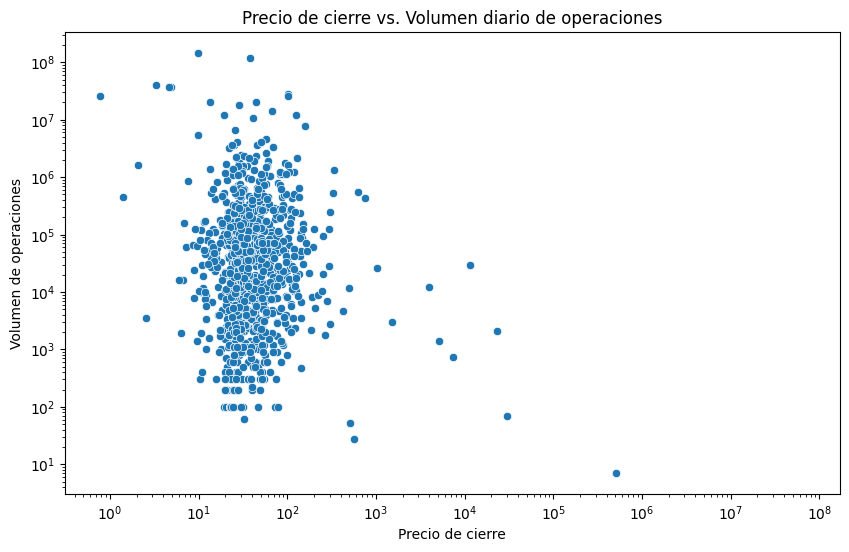

In [16]:
sampled_data = dataset.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='close', y='volume', data=sampled_data)
plt.title('Precio de cierre vs. Volumen diario de operaciones')
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen de operaciones')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# Calculate the correlation matrix
numerical_columns.corr()

,open,high,low,close,adj_close,volume
open,1.000000,0.999753,0.999721,0.999490,0.999215,-0.006948
high,0.999753,1.000000,0.999620,0.999763,0.999524,-0.006943
low,0.999721,0.999620,1.000000,0.999739,0.999470,-0.006960
close,0.999490,0.999763,0.999739,1.000000,0.999756,-0.006948
adj_close,0.999215,0.999524,0.999470,0.999756,1.000000,-0.006997
volume,-0.006948,-0.006943,-0.006960,-0.006948,-0.006997,1.000000


(506418, 6)

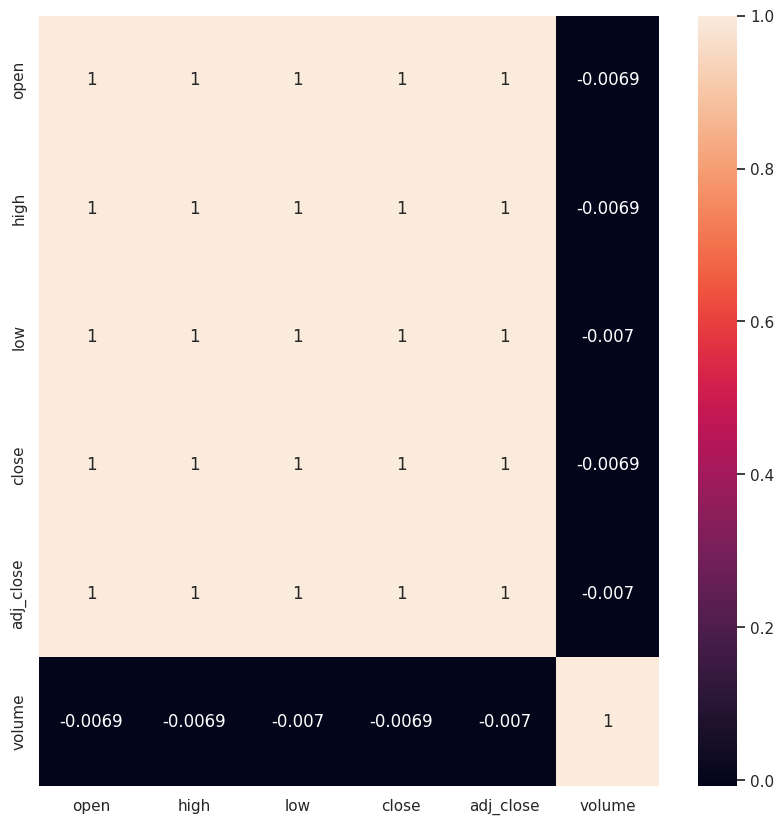

In [ ]:
sns.set_theme(style="dark")
m=numerical_columns.corr()
sns.set(rc = {'figure.figsize' :(10, 10)})
sns.heatmap(m, annot=True)
numerical_columns.shape

(20, 4)

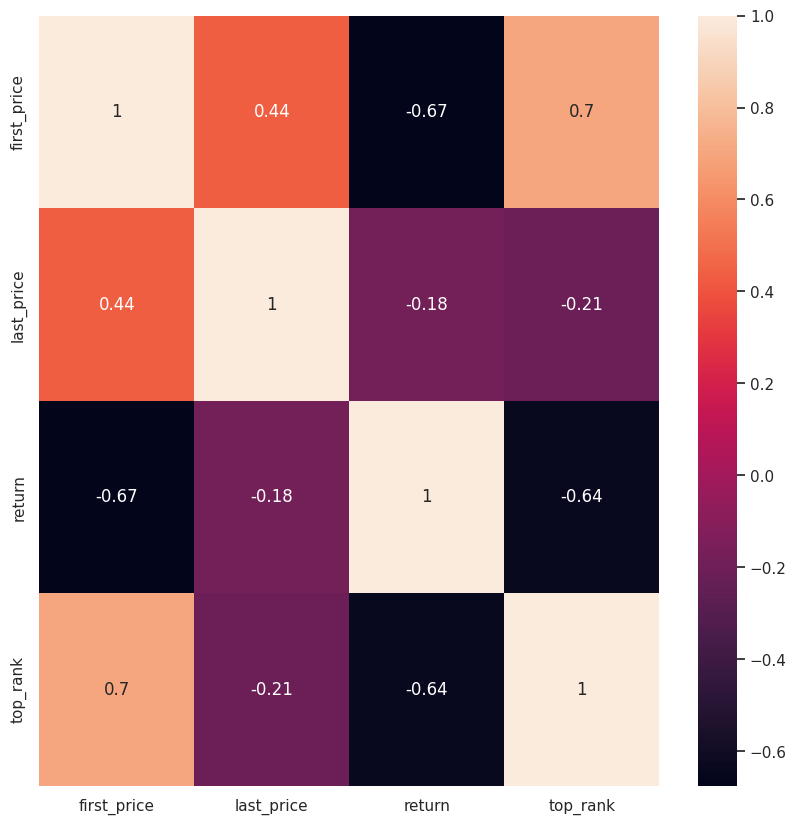

In [ ]:
sns.set_theme(style="dark")
m=df_agg.corr()
sns.set(rc = {'figure.figsize' :(10, 10)})
sns.heatmap(m, annot=True)
df_agg.shape

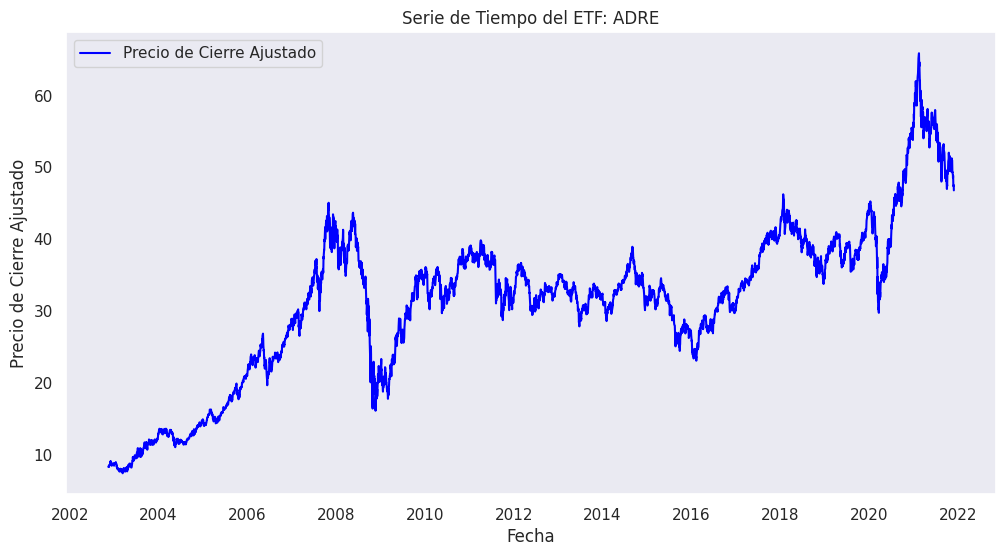

In [ ]:
# Convertir price_date a tipo datetime
df["price_date"] = pd.to_datetime(df["price_date"])

# Seleccionar el ETF con más datos para el análisis
etf_sample = df[df["fund_symbol"] == df["fund_symbol"].value_counts().idxmax()]

# Agrupar por fecha y calcular el precio de cierre ajustado promedio diario
df_time_series = etf_sample.groupby("price_date")["adj_close"].mean()

# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label="Precio de Cierre Ajustado", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title(f"Serie de Tiempo del ETF: {df['fund_symbol'].value_counts().idxmax()}")
plt.legend()
plt.grid()
plt.show()

## **COMPARATIVA APERTURA CIERRE**

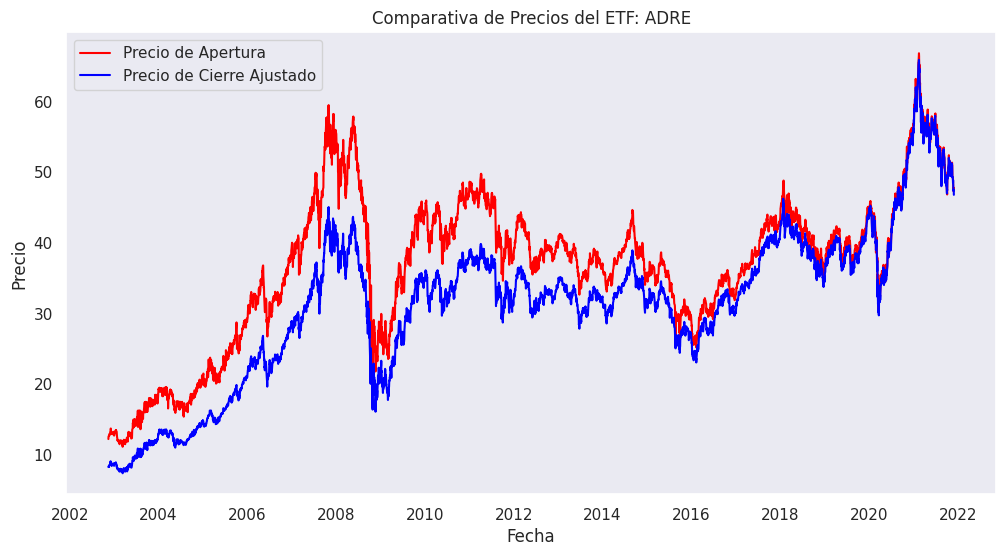

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir price_date a tipo datetime
df["price_date"] = pd.to_datetime(df["price_date"])

# Seleccionar el ETF con más datos para el análisis
etf_sample = df[df["fund_symbol"] == df["fund_symbol"].value_counts().idxmax()]

# Agrupar por fecha y calcular el precio de apertura y cierre ajustado promedio diario
df_time_series = etf_sample.groupby("price_date").agg({"open": "mean", "adj_close": "mean"})

# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_time_series.index, df_time_series["open"], label="Precio de Apertura", color="red")
plt.plot(df_time_series.index, df_time_series["adj_close"], label="Precio de Cierre Ajustado", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title(f"Comparativa de Precios del ETF: {df['fund_symbol'].value_counts().idxmax()}")
plt.legend()
plt.grid()
plt.show()

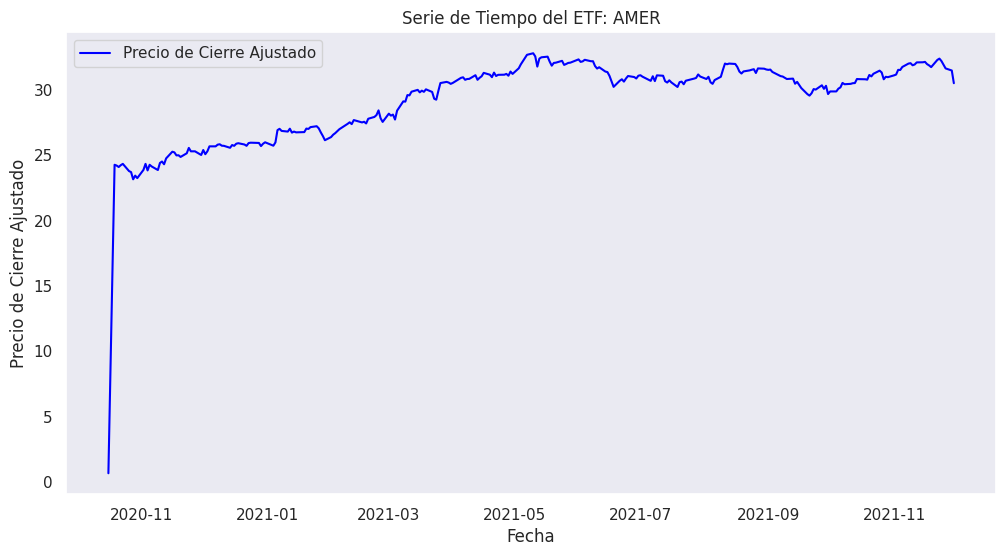

In [ ]:
# Convertir price_date a tipo datetime
df["price_date"] = pd.to_datetime(df["price_date"])

# Obtener el top 20 de ETFs con mayor rendimiento
df_sorted = df.sort_values(by=["fund_symbol", "price_date"])
df_agg = df_sorted.groupby("fund_symbol").agg(
    first_price=("adj_close", "first"),
    last_price=("adj_close", "last")
)
df_agg["return"] = (df_agg["last_price"] - df_agg["first_price"]) / df_agg["first_price"] * 100
df_agg = df_agg[df_agg["first_price"] > 0]
top20_etfs = df_agg.nlargest(20, "return").index

# Filtrar el dataset con solo los ETFs del top 20
df_top20 = df[df["fund_symbol"].isin(top20_etfs)]

# Seleccionar un ETF del top 20 para el análisis
df_sample = df_top20[df_top20["fund_symbol"] == top20_etfs[0]]

# Agrupar por fecha y calcular el precio de cierre ajustado promedio diario
df_time_series = df_sample.groupby("price_date")["adj_close"].mean()

# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label="Precio de Cierre Ajustado", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title(f"Serie de Tiempo del ETF: {top20_etfs[0]}")
plt.legend()
plt.grid()
plt.show()

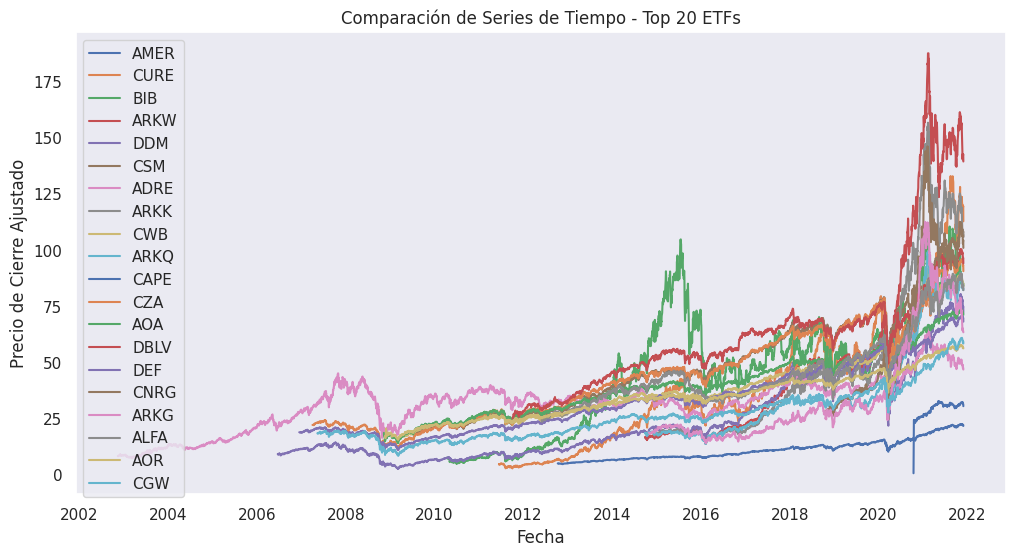

In [ ]:
# Convertir price_date a tipo datetime
df["price_date"] = pd.to_datetime(df["price_date"])

# Obtener el top 20 de ETFs con mayor rendimiento
df_sorted = df.sort_values(by=["fund_symbol", "price_date"])
df_agg = df_sorted.groupby("fund_symbol").agg(
    first_price=("adj_close", "first"),
    last_price=("adj_close", "last")
)
df_agg["return"] = (df_agg["last_price"] - df_agg["first_price"]) / df_agg["first_price"] * 100
df_agg = df_agg[df_agg["first_price"] > 0]
top20_etfs = df_agg.nlargest(20, "return").index

# Filtrar el dataset con solo los ETFs del top 20
df_top20 = df[df["fund_symbol"].isin(top20_etfs)]

# Graficar todas las series de tiempo superpuestas
plt.figure(figsize=(12, 6))
for etf in top20_etfs:
    df_sample = df_top20[df_top20["fund_symbol"] == etf]
    df_time_series = df_sample.groupby("price_date")["adj_close"].mean()
    plt.plot(df_time_series, label=etf)

plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title("Comparación de Series de Tiempo - Top 20 ETFs")
plt.legend()
plt.grid()
plt.show()

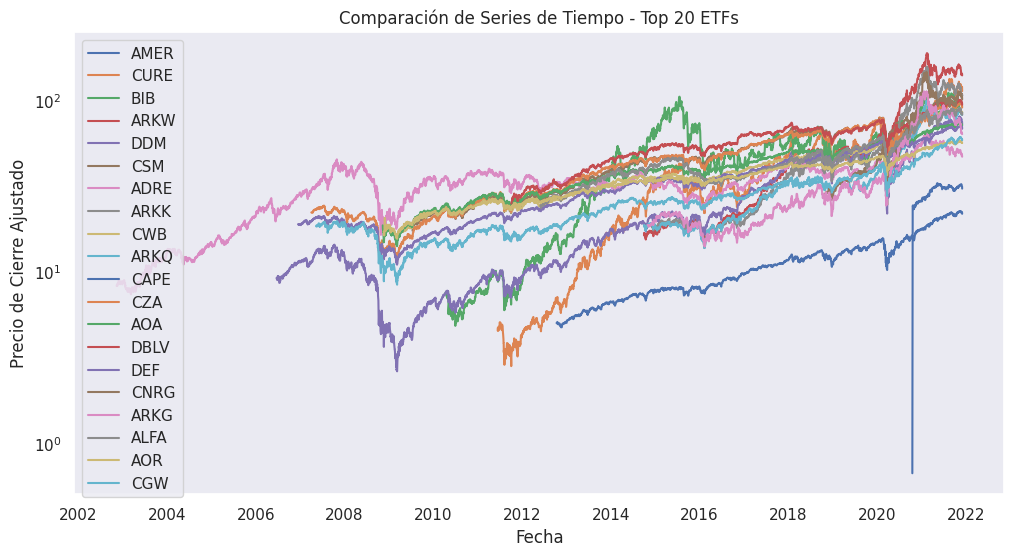

In [ ]:
# Convertir price_date a tipo datetime
df["price_date"] = pd.to_datetime(df["price_date"])

# Obtener el top 20 de ETFs con mayor rendimiento
df_sorted = df.sort_values(by=["fund_symbol", "price_date"])
df_agg = df_sorted.groupby("fund_symbol").agg(
    first_price=("adj_close", "first"),
    last_price=("adj_close", "last")
)
df_agg["return"] = (df_agg["last_price"] - df_agg["first_price"]) / df_agg["first_price"] * 100
df_agg = df_agg[df_agg["first_price"] > 0]
top20_etfs = df_agg.nlargest(20, "return").index

# Filtrar el dataset con solo los ETFs del top 20
df_top20 = df[df["fund_symbol"].isin(top20_etfs)]

# Graficar todas las series de tiempo superpuestas
plt.figure(figsize=(12, 6))
for etf in top20_etfs:
    df_sample = df_top20[df_top20["fund_symbol"] == etf]
    df_time_series = df_sample.groupby("price_date")["adj_close"].mean()
    plt.plot(df_time_series, label=etf)

plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.yscale("log")
plt.title("Comparación de Series de Tiempo - Top 20 ETFs")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Convertir price_date a tipo datetime
df["price_date"] = pd.to_datetime(df["price_date"])

# Definir las ventanas de tiempo para la rentabilidad
def calcular_rentabilidad(df, years):
    df_sorted = df.sort_values(by=["fund_symbol", "price_date"])
    df_agg = df_sorted.groupby("fund_symbol").agg(
        first_price=("adj_close", "first"),
        last_price=("adj_close", "last")
    )
    df_agg[f"return_{years}y"] = (df_agg["last_price"] - df_agg["first_price"]) / df_agg["first_price"] * 100
    return df_agg[f"return_{years}y"]

# Calcular rentabilidad para cada periodo
df_rentabilidad = pd.DataFrame()
df_rentabilidad["return_5y"] = calcular_rentabilidad(df[df["price_date"] >= pd.Timestamp.now() - pd.DateOffset(years=5)], 5)
df_rentabilidad["return_10y"] = calcular_rentabilidad(df[df["price_date"] >= pd.Timestamp.now() - pd.DateOffset(years=10)], 10)
df_rentabilidad["return_25y"] = calcular_rentabilidad(df[df["price_date"] >= pd.Timestamp.now() - pd.DateOffset(years=25)], 25)
df_rentabilidad["return_50y"] = calcular_rentabilidad(df[df["price_date"] >= pd.Timestamp.now() - pd.DateOffset(years=50)], 50)

# Verificar si la columna 'dividends' existe en el DataFrame
if 'dividends' in df.columns:
    # Calcular dividendos por año, lustro y década si la columna existe
    df_dividendos = df.groupby("fund_symbol")["dividends"].agg(
        annual_dividends="sum",
        five_year_dividends=lambda x: x.rolling(window=5, min_periods=1).sum(),
        ten_year_dividends=lambda x: x.rolling(window=10, min_periods=1).sum()
    )

    # Unir las tablas
    df_final = df_rentabilidad.join(df_dividendos, how="left")
else:
    # Si la columna 'dividends' no existe, mostrar un mensaje y asignar un DataFrame vacío a df_final
    print("La columna 'dividends' no se encuentra en el DataFrame.")
    df_final = df_rentabilidad
# Mostrar los primeros resultados
print(df_final.head(50))

La columna 'dividends' no se encuentra en el DataFrame.
               return_5y   return_10y   return_25y   return_50y
fund_symbol                                                    
AAA             0.764588     0.764588     0.764588     0.764588
AAAU           20.204778    50.000000    50.000000    50.000000
AADR           73.250564    66.170501   164.769297   164.769297
AAXJ           56.501315    47.624956   107.034551   107.034551
ABEQ           39.648033     8.878128     8.878128     8.878128
ACES          191.188041   203.983573   203.983573   203.983573
ACIO           38.866755    27.884223    27.884223    27.884223
ACSI           96.165644   116.047297   116.047297   116.047297
ACTV           45.973290    45.973290    45.973290    45.973290
ACVF           39.803037    39.803037    39.803037    39.803037
ACWF           74.755016    67.411712    67.411712    67.411712
ACWI           84.372760    95.700970   166.114847   166.114847
ACWV           41.504026    67.550097   148.0976

# **Ecuación black schwarz**

In [ ]:
# Recalcular la volatilidad anualizada por ETF

# Convertir la columna de fecha a formato datetime
df["price_date"] = pd.to_datetime(df["price_date"])

# Ordenar el dataset por símbolo del ETF y fecha
df = df.sort_values(by=["fund_symbol", "price_date"])

# Calcular los retornos logarítmicos
df["log_return"] = np.log(df["adj_close"] / df.groupby("fund_symbol")["adj_close"].shift(1))

# Calcular la volatilidad anualizada por ETF (usando 252 días de trading por año)
volatility = df.groupby("fund_symbol")["log_return"].std() * np.sqrt(252)

# Mostrar las primeras volatilidades calculadas
volatility.head()

,log_return
fund_symbol,
AAA,0.007445
AAAU,0.150886
AADR,0.203947
AAXJ,0.259438
ABEQ,0.193055


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Cargar el dataset (ajusta el nombre de la columna de fecha y precio según tu archivo)
df = pd.read_csv('ETF prices.csv', parse_dates=['price_date'])
df = df.sort_values('price_date')

# Supongamos que 'Adj Close' es la columna con el precio ajustado
df['LogReturn'] = np.log(df['adj_close'] / df['adj_close'].shift(1))

# Calcular volatilidad histórica anualizada para ventanas de 30, 60 y 90 días
for window in [30, 60, 90]:
    df[f'Vol_{window}'] = df['LogReturn'].rolling(window=window).std() * np.sqrt(252)

# Función Black-Scholes para opción Call
def black_scholes_call(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Parámetros para el cálculo
r = 0.01  # Ejemplo: tasa libre de riesgo del 1%
S = df['adj_close'].iloc[-1]  # Precio actual del ETF (último valor)
K = S  # Para una opción at-the-money

# Calcular y mostrar el precio de la opción call para cada intervalo
for window in [30, 60, 90]:
    T = window / 365.0  # Tiempo en años
    sigma = df[f'Vol_{window}'].iloc[-1]  # Volatilidad calculada
    call_price = black_scholes_call(S, K, r, sigma, T)
    print(f'Precio de la opción call para {window} días: {call_price:.2f}')


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Precio de la opción call para 30 días: 26.84
Precio de la opción call para 60 días: 28.24
Precio de la opción call para 90 días: 28.47


# **Variable de clasificación**

In [ ]:
import pandas as pd
import numpy as np

# 1. Cargar el dataset
# Asegúrate de ajustar 'Fecha', 'Ticker' y 'Adj Close' a los nombres que realmente uses.
df = pd.read_csv('ETF prices.csv', parse_dates=['price_date'])

# Ordenar el DataFrame por fecha para cada ETF
df = df.sort_values('price_date')

# 2. Calcular la rentabilidad acumulada de cada ETF
# Suponiendo que cada ETF tiene registros cronológicos, usamos el primer y último precio.
# Reemplazar 'Ticker' por 'fund_symbol' para agrupar por el nombre del ETF
rentabilidad = df.groupby('fund_symbol').agg(
    Precio_Inicial=('adj_close', 'first'),
    Precio_Final=('adj_close', 'last')
)

rentabilidad['Rentabilidad'] = rentabilidad['Precio_Final'] / rentabilidad['Precio_Inicial'] - 1

# 3. Seleccionar los 20 mejores ETFs en términos de rentabilidad
top20 = rentabilidad.sort_values('Rentabilidad', ascending=False).head(20)

# 4. Crear una variable "Clasificacion" asignando un ranking del 1 al 20
top20['Clasificacion'] = np.arange(1, len(top20) + 1)

print(top20)

             Precio_Inicial  Precio_Final  Rentabilidad  Clasificacion
fund_symbol                                                           
VSDA                   0.00         44.56           inf              1
GIGB                   0.00         54.32           inf              2
TUSA                   0.00         48.67           inf              3
USOI                   0.00          4.70           inf              4
FLQL                   0.00         44.52           inf              5
FLQM                   0.00         45.82           inf              6
JPST                   0.00         50.59           inf              7
FLQS                   0.00         38.84           inf              8
TECL                   0.25         80.22    319.880000              9
TQQQ                   0.86        163.49    189.104651             10
SOXL                   0.62         64.67    103.306452             11
RETL                   0.50         40.79     80.580000             12
UPRO  

In [ ]:
import pandas as pd
import numpy as np

# 1. Cargar el dataset
df = pd.read_csv('ETF prices.csv', parse_dates=['price_date'])
df = df.sort_values('price_date')

# 2. Calcular la rentabilidad acumulada de cada ETF
rentabilidad = df.groupby('fund_symbol').agg(
    Precio_Inicial=('adj_close', 'first'),
    Precio_Final=('adj_close', 'last')
)

# Excluir ETFs cuyo precio inicial sea 0
rentabilidad = rentabilidad[rentabilidad['Precio_Inicial'] != 0]

# Calcular la rentabilidad acumulada
rentabilidad['Rentabilidad'] = rentabilidad['Precio_Final'] / rentabilidad['Precio_Inicial'] - 1

# 3. Seleccionar los 20 mejores ETFs en términos de rentabilidad
top20 = rentabilidad.sort_values('Rentabilidad', ascending=False).head(20)

# 4. Crear una variable "Clasificacion" asignando un ranking del 1 al 20
top20['Clasificacion'] = np.arange(1, len(top20) + 1)

print(top20)

             Precio_Inicial  Precio_Final  Rentabilidad  Clasificacion
fund_symbol                                                           
TECL                   0.25         80.22    319.880000              1
TQQQ                   0.86        163.49    189.104651              2
SOXL                   0.62         64.67    103.306452              3
RETL                   0.50         40.79     80.580000              4
UPRO                   2.35        134.85     56.382979              5
AMER                   0.67         30.50     44.522388              6
QLD                    1.97         87.61     43.472081              7
ROM                    4.16        124.35     28.891827              8
MIDU                   2.40         60.74     24.308333              9
CURE                   4.70        112.73     22.985106             10
UDOW                   3.14         72.64     22.133758             11
USD                    2.41         54.08     21.439834             12
SPY   

In [ ]:
rentabilidad = rentabilidad[rentabilidad['Precio_Inicial'] != 0]

rentabilidad

,Precio_Inicial,Precio_Final,Rentabilidad
fund_symbol,,,
AAA,24.85,25.04,0.007646
AAAU,11.74,17.61,0.500000
AADR,23.19,61.40,1.647693
AAXJ,40.23,83.29,1.070346
ABEQ,24.78,26.98,0.088781
...,...,...,...
ZHDG,20.04,20.58,0.026946
ZIG,25.04,29.84,0.191693
ZIVZF,12.30,30.00,1.439024


In [ ]:
rent_ord = rentabilidad.sort_values('Rentabilidad', ascending=False)

rent_ord.head(20)

,Precio_Inicial,Precio_Final,Rentabilidad
fund_symbol,,,
TECL,0.25,80.22,319.880000
TQQQ,0.86,163.49,189.104651
SOXL,0.62,64.67,103.306452
RETL,0.50,40.79,80.580000
UPRO,2.35,134.85,56.382979
AMER,0.67,30.50,44.522388
QLD,1.97,87.61,43.472081
ROM,4.16,124.35,28.891827
MIDU,2.40,60.74,24.308333


# **CODIGO NUEVO DATAFRAME (TOP 20)**

In [ ]:
import pandas as pd
import numpy as np

# 1. Cargar el dataset
df = pd.read_csv('ETF prices.csv', parse_dates=['price_date'])
df = df.sort_values('price_date')

# 2. Calcular la rentabilidad acumulada de cada ETF
rentabilidad = df.groupby('fund_symbol').agg(
    Precio_Inicial=('adj_close', 'first'),
    Precio_Final=('adj_close', 'last')
)
# Excluir ETFs que comienzan en 0
rentabilidad = rentabilidad[rentabilidad['Precio_Inicial'] != 0]
rentabilidad['Rentabilidad'] = rentabilidad['Precio_Final'] / rentabilidad['Precio_Inicial'] - 1

# 3. Seleccionar los 20 mejores ETFs según rentabilidad
top20 = rentabilidad.sort_values('Rentabilidad', ascending=False).head(20)
top20_tickers = top20.index.tolist()

# 4. Crear un nuevo DataFrame filtrando el dataset original para conservar sólo las filas de los 20 mejores ETFs
df_top20 = df[df['fund_symbol'].isin(top20_tickers)].copy()

# (Opcional) Agregar la clasificación como una variable extra:
top20['Clasificacion'] = np.arange(1, len(top20) + 1)
# Unir la clasificación al DataFrame filtrado, usando el Ticker como llave:
df_top20 = df_top20.merge(top20[['Clasificacion', 'Rentabilidad']], left_on='fund_symbol', right_index=True, how='left')

# 6. Agregar una columna con los valores de rentabilidad en formato porcentual
df_top20['Rentabilidad_Porcentaje'] = (df_top20['Rentabilidad'] * 100).round(2)

# Visualizar el DataFrame resultante
print(df_top20)

        fund_symbol price_date    open    high     low   close  adj_close  \
3262244         SPY 1993-01-29   43.97   43.97   43.75   43.94      25.80   
3262245         SPY 1993-02-01   43.97   44.25   43.97   44.25      25.98   
3262246         SPY 1993-02-02   44.22   44.38   44.12   44.34      26.04   
3262247         SPY 1993-02-03   44.41   44.84   44.38   44.81      26.31   
3262248         SPY 1993-02-04   44.97   45.09   44.47   45.00      26.42   
...             ...        ...     ...     ...     ...     ...        ...   
3514052        UPRO 2021-11-30  140.49  142.33  134.31  134.85     134.85   
3502742        UMDD 2021-11-30   32.70   32.70   30.61   30.77      30.77   
3415092        TQQQ 2021-11-30  169.68  172.79  160.71  163.49     163.49   
3457402         UCC 2021-11-30  102.47  102.96  102.32  102.32     102.32   
3540763         USD 2021-11-30   55.64   56.36   52.78   54.08      54.08   

           volume  Clasificacion  Rentabilidad  Rentabilidad_Porcentaje  
3

In [ ]:
df_top20.to_csv('top20_ETFs.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose


df_20 = df_top20.copy()

In [ ]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64715 entries, 3262244 to 3540763
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fund_symbol              64715 non-null  object        
 1   price_date               64715 non-null  datetime64[ns]
 2   open                     64715 non-null  float64       
 3   high                     64715 non-null  float64       
 4   low                      64715 non-null  float64       
 5   close                    64715 non-null  float64       
 6   adj_close                64715 non-null  float64       
 7   volume                   64715 non-null  int64         
 8   Clasificacion            64715 non-null  int64         
 9   Rentabilidad             64715 non-null  float64       
 10  Rentabilidad_Porcentaje  64715 non-null  float64       
 11  Trimestre                64715 non-null  period[Q-DEC] 
dtypes: datetime64[ns](1), float64

In [ ]:
# Cargar el dataset
df_new = df_20.copy()

# Convertir la columna 'price_date' a tipo datetime
df_new["price_date"] = pd.to_datetime(df_new["price_date"])

# Reset the index before resampling
df_new = df_new.reset_index(drop=True)

# Agrupar por 'fund_symbol' y por trimestre usando resample (con la columna 'price_date')
df_trimestral = df_new.groupby("fund_symbol").resample('Q', on='price_date').agg({
    'open': 'mean',
    'high': 'mean',
    'low': 'mean',
    'close': 'mean',
    'adj_close': 'mean',
    'volume': 'sum',  # Sumar el volumen total por trimestre
    'Clasificacion': 'first',  # Tomar la clasificación del primer registro del trimestre
    'Rentabilidad': 'mean',  # Promediar la rentabilidad
    'Rentabilidad_Porcentaje': 'mean'  # Promediar la rentabilidad en porcentaje
}).reset_index()

# Mostrar las primeras filas del DataFrame resultante
print(df_trimestral.head())

<ipython-input-57-be1e61c07547>:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_trimestral = df_new.groupby("fund_symbol").resample('Q', on='price_date').agg({


  fund_symbol price_date       open       high        low      close  \
0        AMER 2020-12-31  24.959811  24.987358  24.879623  24.906604   
1        AMER 2021-03-31  28.324098  28.399836  28.253770  28.332623   
2        AMER 2021-06-30  31.781111  31.819524  31.736032  31.781429   
3        AMER 2021-09-30  31.040938  31.057500  30.990313  31.008750   
4        AMER 2021-12-31  31.248810  31.267143  31.209524  31.230476   

   adj_close  volume  Clasificacion  Rentabilidad  Rentabilidad_Porcentaje  
0  24.504340  378100              6     44.522388                  4452.24  
1  27.972787  559900              6     44.522388                  4452.24  
2  31.510635   50300              6     44.522388                  4452.24  
3  30.887500   30000              6     44.522388                  4452.24  
4  31.230476    8100              6     44.522388                  4452.24  


In [ ]:
df_trimestral.head(10)

,fund_symbol,price_date,open,high,low,close,adj_close,volume,Clasificacion,Rentabilidad,Rentabilidad_Porcentaje
0,AMER,2020-12-31,24.959811,24.987358,24.879623,24.906604,24.504340,378100,6,44.522388,4452.24
1,AMER,2021-03-31,28.324098,28.399836,28.253770,28.332623,27.972787,559900,6,44.522388,4452.24
2,AMER,2021-06-30,31.781111,31.819524,31.736032,31.781429,31.510635,50300,6,44.522388,4452.24
3,AMER,2021-09-30,31.040938,31.057500,30.990313,31.008750,30.887500,30000,6,44.522388,4452.24
4,AMER,2021-12-31,31.248810,31.267143,31.209524,31.230476,31.230476,8100,6,44.522388,4452.24
5,CURE,2011-06-30,4.994167,5.003333,4.958333,4.973333,4.702500,204000,10,22.985106,2298.51
6,CURE,2011-09-30,4.120781,4.191875,4.039844,4.113906,3.889531,1791200,10,22.985106,2298.51
7,CURE,2011-12-31,3.907302,3.956190,3.855873,3.910952,3.716508,2141600,10,22.985106,2298.51
8,CURE,2012-03-31,4.908226,4.932097,4.885484,4.916774,4.761613,893600,10,22.985106,2298.51
9,CURE,2012-06-30,5.236667,5.253810,5.202540,5.227778,5.063016,710400,10,22.985106,2298.51


In [ ]:
df_trimestral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fund_symbol              1045 non-null   object        
 1   price_date               1045 non-null   datetime64[ns]
 2   open                     1045 non-null   float64       
 3   high                     1045 non-null   float64       
 4   low                      1045 non-null   float64       
 5   close                    1045 non-null   float64       
 6   adj_close                1045 non-null   float64       
 7   volume                   1045 non-null   int64         
 8   Clasificacion            1045 non-null   int64         
 9   Rentabilidad             1045 non-null   float64       
 10  Rentabilidad_Porcentaje  1045 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 89.9+ KB


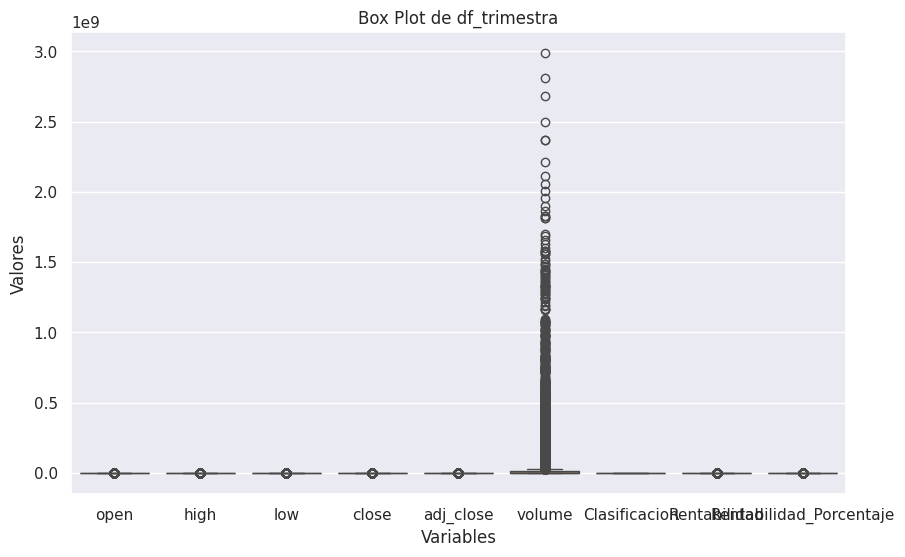

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new)

# Títulos y etiquetas
plt.title("Box Plot de df_trimestra")
plt.xlabel("Variables")
plt.ylabel("Valores")

# Mostrar el gráfico
plt.show()